# Multiple Linear Regression using Gradient Descent based approach¶


We will be using a student score dataset. In this particular dataset, we have math, reading and writing exam scores of 1000 students. We will try to predict the score of writing exam from math and reading scores.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 5.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('data/student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


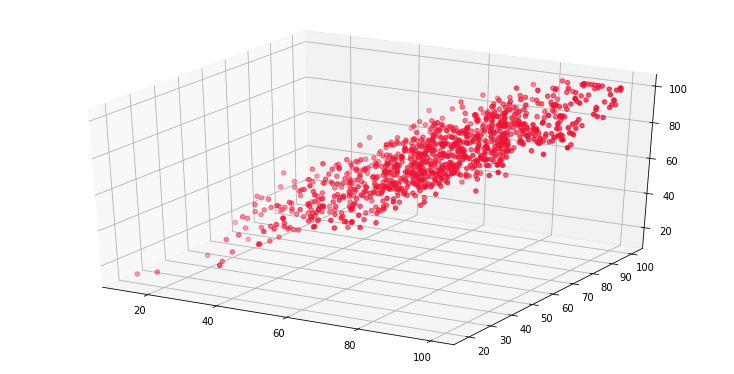

In [4]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
_=ax.scatter(math, read, write, color='#ef1234')
#plt.show()


In [5]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [6]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J
initial_cost = cost_function(X, Y, B)
print(initial_cost)

2470.11


In [7]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [8]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.475123473539167


<Figure size 720x360 with 0 Axes>

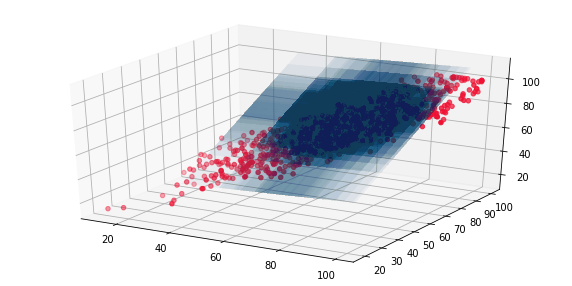

In [12]:
fig = plt.figure()
#ax = Axes3D(fig)
plt3d = plt.figure().gca(projection='3d')
xx, yy = np.meshgrid(math, read)
#features = pd.core.frame.DataFrame({'TV':xx.ravel(),'Radio':yy.ravel()})
out =-0.47889172+xx.ravel()*0.09137252+yy.ravel()+ 0.90144884
#out.reshape(xx.shape)
_=plt3d.plot_surface(xx, yy, out.reshape(xx.shape), alpha=0.01)
# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()
# _=ax.hold(True)
_=ax.scatter(math, read, write, color='#ef1234')
plt.show()

#ax.plot_surface(xx, yy, out.reshape(xx.shape), color='None')



In [13]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.577143972727789
0.9097223273061553


# Simple Linear Regression using sklearn

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
reg.coef_
reg.intercept_
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

array([0.09600221, 0.91049989])

-1.4624373849419783

4.572887051836439
0.9098901726717316
